## Project Heart Disease Prediction

This note book into using various python based  machine learning data science libraries is attempt to build 
the machine learning model to predict the patient has a heart disease or not based on their medical attributes.

we are going to take following apporach:
1.Problem Definition
2.Data
3.Evaluation
4.Features
5.Modelling
6.Experimentation
## 1.Problem Definition
In statement,
>Given Clinical Parameters about a patient can we predict whether or not they have heart disease?
## 2. Data
The  original dataa  came from the clevand data from the UCI machine learning repository-https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also available in on kaggle-https://www.kaggle.com/ronitf/heart-disease-uci
## 3.Evaluation
> if we can reach  95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features
This where youll get information about each of features in your data
## Create data dictionary

age sort age in years


sex sort(1 = male; 0 = female)

cp sort chest pain type

trestbps sort resting blood pressure (in mm Hg on admission to the hospital)


chol sort serum cholestoral in mg/dl


fbs sort (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)


restecg sort resting electrocardiographic results


thalach sort maximum heart rate achieved


exang sort exercise induced angina (1 = yes; 0 = no)


oldpeak sort ST depression induced by exercise relative to rest

## Preparing the tools
we are going to use pandas numpy matplotlib scikitlearn

In [1]:
# import the All required tools
import numpy as n
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
#model from
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#model Evaluations
from sklearn.model_selection import  train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve

In [2]:
df=pd.read_csv("6.1 heart-disease.csv.csv")
df.shape

(303, 14)

## Exploring the Data
Find More about the data  and become subject matter export depend on data set working with
1. what are trying to solve
2. what data we have and how treat it different types
3. what are the data missing
4. what are the outliers and why should we care about them
5. howw to add and out the features from your data


In [3]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

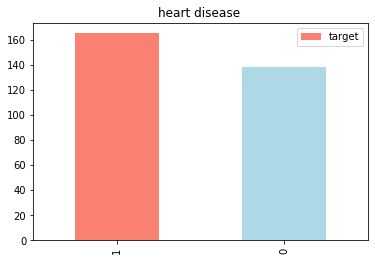

In [4]:
df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"],title="heart disease ",legend=(0,1));

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

#### In the sex column 0 For Female 1 For Male
#### In the target column 0 or having heart disease and 1 for not having heart disease

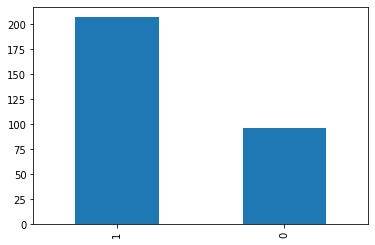

In [11]:
df["sex"].value_counts().plot(kind="bar");

In [12]:
pd.crosstab(df["target"],df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


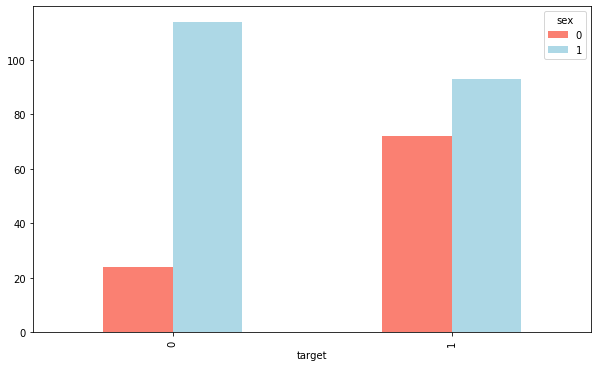

In [17]:
pd.crosstab(df["target"],df["sex"]).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"]);

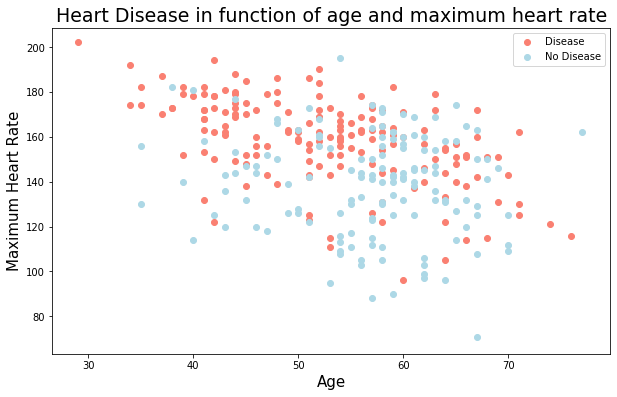

In [44]:
plt.figure(figsize=(10,6))
#Scatter for positive samples
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c='salmon');
# Scatter for the negative samples
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c='lightblue');
plt.title("Heart Disease in function of age and maximum heart rate",size=19);
plt.xlabel("Age",size=15);
plt.ylabel("Maximum Heart Rate",size=15)
plt.legend(["Disease","No Disease"])

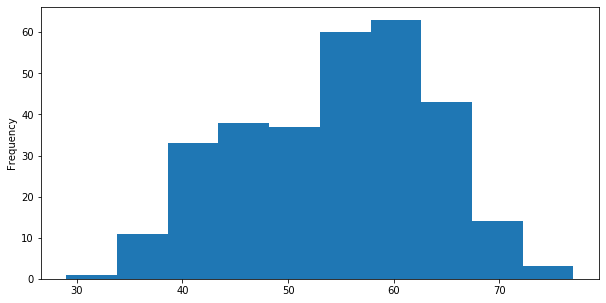

In [62]:
df.age.plot.hist(figsize=(10,5));

#### Heart disease Frequency per chest pain Type
3. cp - chest pain type
    * 0 : Typical Angina 
    * 1 : ATypical Angina
    * 2 : NON typical Angina
    * 3 : asymtomatic    
    

In [52]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


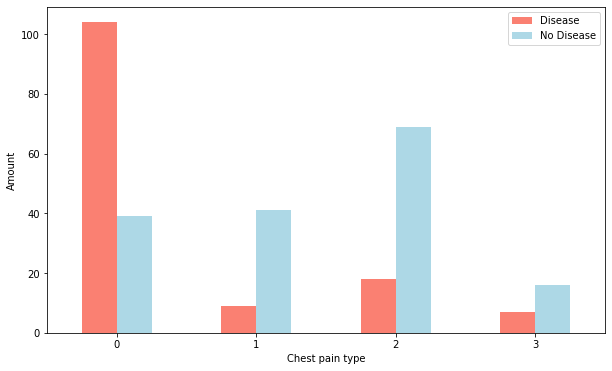

In [63]:

pd.crosstab(df.cp,df.target).plot(kind="bar",color=["salmon","lightblue"],figsize=(10,6));
plt.xlabel("Chest pain type")
plt.ylabel("Amount")
plt.legend(["Disease","No Disease"])
plt.xticks(rotation=0);